This is to re-create the network of dietary factors and its associated heart disease to study which are the important nodes. It is networkx learning purpose

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r'dietary-factors-assoc-heart-disease.xlsx')
df.head()

,Category,Exposure,Label,Phenotype,Association,Effect Size,PubMed_ID
0,Food/Diet,fish,Fish,CHD,no,NaN,7885425.0
1,Lipid,n-3 fatty acid,n-3 FA,CHD,no,NaN,7885425.0
2,Lipid,linolenic acid,Linolenic acid,MI,neg,0.41,8688759.0
3,Lipid,saturated fat,SFA,CHD,pos,2.21,8688759.0
4,Lipid,saturated fat,SFA,MI,pos,1.22,8688759.0


In [4]:
df2 = df.loc[(df['Effect Size'].notnull())]
df2 = df2[['Label','Phenotype','Association', 'Effect Size']]
df2

,Label,Phenotype,Association,Effect Size
2,Linolenic acid,MI,neg,0.41
3,SFA,CHD,pos,2.21
4,SFA,MI,pos,1.22
7,MUFA,CHD,neg,0.81
8,PUFA,CHD,neg,0.62
...,...,...,...,...
284,Vitamin E,CHD,neg,0.66
285,Brussel,CHD,pos,1.16
286,Cabbage,CHD,pos,1.09
287,Carotene,CHD,neg,0.30


In [106]:
good_dietary_factors = df.loc[(df['Association'] == 'neg')]['Label'].unique()
good_dietary_factors

array(['Linolenic acid', 'MUFA', 'PUFA', 'T-folate', 'Vitamin B6', 'Nuts',
       'Citrus frt + juice', 'Citrus frt juice', 'Cruc veg',
       'frt and veg', 'Green leafy veg', 'PUFA/SFA',
       'Vitamin C frt and veg', 'Prudent diet', 'Fish', 'Omega-3 FA',
       'Alcohol', 'S-vitamin C', 'T-vitamin C', 'S-magnesium',
       'T-magnesum', 'cereal fiber', 'D-fiber', 'frt fiber',
       'Adiponectin', 'Added bran', 'Whole grain', 'a-linolenic',
       'DASH score', 'Plasma 25[OH]D', 'DPA', 'EPA', 'PUFA rep SFA',
       'Coffee', 'MED score', 'Fish rep red meat',
       'Low fat dairy rep red meat', 'Nuts rep red meat',
       'Poultry rep red meat', 'Veg protein', 'Egg', 'D-magnesium',
       'b-carotene frt and veg', 'Citrus frt',
       'Plasma fetuin-A + high C-reactive protein', 'Plasma magnesium',
       'Linoleic acid', 'linoleic acid', 'Linoleic acid rep SFA',
       'linoleic acid rep SFA', 'S-potassium', 'VLCSFA',
       'Carb of whole grains', 'Carb of whole grains rep SFA',


In [5]:
bad_dietary_factors = df.loc[(df['Association'] == 'pos')]['Label'].unique()
bad_dietary_factors

array(['SFA', 'SFA rep carb', 'Trans USFA rep carb',
       'High fat/low fat dair', 'Red meat/poultry and fish',
       'Stearic acid', 'Western diet', 'D-vitamin C', 'Trans',
       'Lipoprotein', 'Lipoprotein and C-reactive protein',
       'Lipoprotein and fibrinogen', 'Trans 18:1', 'Trans 18:2',
       'Trans in erythrocytes', 'plasma 15:0', 'Plasma DHEA',
       'Carb rep SFA', 'SSB', 'A-protein', 'T-protein', 'HbA1c',
       'Homocysteine', 'Fried-food', 'b2-microglobulin', 'Cystatin C',
       'A-LCD', 'Animal flesh', 'Poultry', 'T-meat',
       'Carb of refined starches/added sugars', 'Melatonin',
       'UNH-plant diet', 'Carb/cereal fiber', 'Glycemic load',
       'Phosphatidylcholine', 'GLS', 'Brussel', 'Cabbage'], dtype=object)

In [6]:
G = nx.from_pandas_edgelist(df2, 'Label', 'Phenotype', edge_attr=['Association','Effect Size'],create_using=nx.DiGraph())
G

In [7]:
dic = dict(zip(df.Label, df.Category))
lis = list(dic)
s = dict(set(val for i in lis for val in dic.items()))
df2.Phenotype.unique()
import itertools
phenotype = dict(zip(df.Phenotype.unique(), itertools.repeat("Heart Disease")))
phenotype
z = s | phenotype

In [8]:
for node in list(G.nodes()):
    G.nodes[node]['Category'] = z[node]

In [9]:
G.nodes(data=True)

NodeDataView({'Linolenic acid': {'Category': 'Lipid'}, 'MI': {'Category': 'Heart Disease'}, 'SFA': {'Category': 'Lipid'}, 'CHD': {'Category': 'Heart Disease'}, 'MUFA': {'Category': 'Lipid'}, 'PUFA': {'Category': 'Lipid'}, 'SFA rep carb': {'Category': 'Lipid'}, 'Trans USFA rep carb': {'Category': 'Lipid'}, 'T-folate': {'Category': 'Mineral'}, 'Vitamin B6': {'Category': 'Vitamin'}, 'Nuts': {'Category': 'Food/Diet'}, 'Citrus frt + juice': {'Category': 'Food/Diet'}, 'Ischemic stroke': {'Category': 'Heart Disease'}, 'Citrus frt juice': {'Category': 'Food/Diet'}, 'Cruc veg': {'Category': 'Food/Diet'}, 'frt and veg': {'Category': 'Food/Diet'}, 'Green leafy veg': {'Category': 'Food/Diet'}, 'PUFA/SFA': {'Category': 'Lipid'}, 'Stearic acid': {'Category': 'Lipid'}, 'Vitamin C frt and veg': {'Category': 'Vitamin'}, 'Prudent diet': {'Category': 'Food/Diet'}, 'Western diet': {'Category': 'Food/Diet'}, 'Fish': {'Category': 'Food/Diet'}, 'Omega-3 FA': {'Category': 'Lipid'}, 'Alcohol': {'Category': 'Al

In [10]:
G.edges(data=True)

OutEdgeDataView([('Linolenic acid', 'MI', {'Association': 'neg', 'Effect Size': 0.41}), ('SFA', 'CHD', {'Association': 'pos', 'Effect Size': 1.07}), ('SFA', 'MI', {'Association': 'pos', 'Effect Size': 1.22}), ('MUFA', 'CHD', {'Association': 'neg', 'Effect Size': 0.81}), ('PUFA', 'CHD', {'Association': 'neg', 'Effect Size': 0.8}), ('SFA rep carb', 'CHD', {'Association': 'pos', 'Effect Size': 1.17}), ('Trans USFA rep carb', 'CHD', {'Association': 'pos', 'Effect Size': 1.93}), ('T-folate', 'CHD', {'Association': 'neg', 'Effect Size': 0.69}), ('T-folate', 'Peripheral artery disease', {'Association': 'neg', 'Effect Size': 0.9}), ('Vitamin B6', 'CHD', {'Association': 'neg', 'Effect Size': 0.67}), ('Nuts', 'CHD', {'Association': 'neg', 'Effect Size': 0.65}), ('Citrus frt + juice', 'Ischemic stroke', {'Association': 'neg', 'Effect Size': 0.81}), ('Citrus frt juice', 'Ischemic stroke', {'Association': 'neg', 'Effect Size': 0.75}), ('Cruc veg', 'Ischemic stroke', {'Association': 'neg', 'Effect S

In [156]:
d = dict(G.degree)
{k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}


{'CHD': 79,
 'Ischemic stroke': 9,
 'Total stroke': 7,
 'MI': 6,
 'Ischemic heart disease': 6,
 'CVD': 4,
 'Peripheral artery disease': 4,
 'Hypertension': 4,
 'DPA': 3,
 'Nonfatal MI': 3,
 'MED score': 3,
 'SFA': 2,
 'T-folate': 2,
 'frt and veg': 2,
 'Green leafy veg': 2,
 'Alcohol': 2,
 'S-magnesium': 2,
 'T-magnesum': 2,
 'DASH score': 2,
 'Plasma magnesium': 2,
 'DHA': 2,
 'Linolenic acid': 1,
 'MUFA': 1,
 'PUFA': 1,
 'SFA rep carb': 1,
 'Trans USFA rep carb': 1,
 'Vitamin B6': 1,
 'Nuts': 1,
 'Citrus frt + juice': 1,
 'Citrus frt juice': 1,
 'Cruc veg': 1,
 'PUFA/SFA': 1,
 'Stearic acid': 1,
 'Vitamin C frt and veg': 1,
 'Prudent diet': 1,
 'Western diet': 1,
 'Fish': 1,
 'Omega-3 FA': 1,
 'S-vitamin C': 1,
 'T-vitamin C': 1,
 'cereal fiber': 1,
 'D-fiber': 1,
 'frt fiber': 1,
 'Adiponectin': 1,
 'Added bran': 1,
 'Whole grain': 1,
 'D-vitamin C': 1,
 'Trans': 1,
 'Lipoprotein': 1,
 'Lipoprotein and C-reactive protein': 1,
 'Lipoprotein and fibrinogen': 1,
 'a-linolenic': 1,
 'Su

In [157]:
edges = G.edges()
colors = [G[u][v]['Association'] for u,v in edges]
colors = list(map(lambda x: x.replace('neg', 'g'), colors))
colors = list(map(lambda x: x.replace('pos', 'r'), colors))
nodes = G.nodes()
node_sizes = [500 if nodes[n]['Category'] == 'Heart Disease' else 50 for n in nodes]
node_colors =['yellow' if nodes[n]['Category'] == 'Heart Disease' else 'blue' for n in nodes]
node_fonts =[15 if nodes[n]['Category'] == 'Heart Disease' else 5 for n in nodes]
# node_fonts
for k,v in d.items():
    if v > 2:
        d[k] = 30
    else:
        d[k] = 5


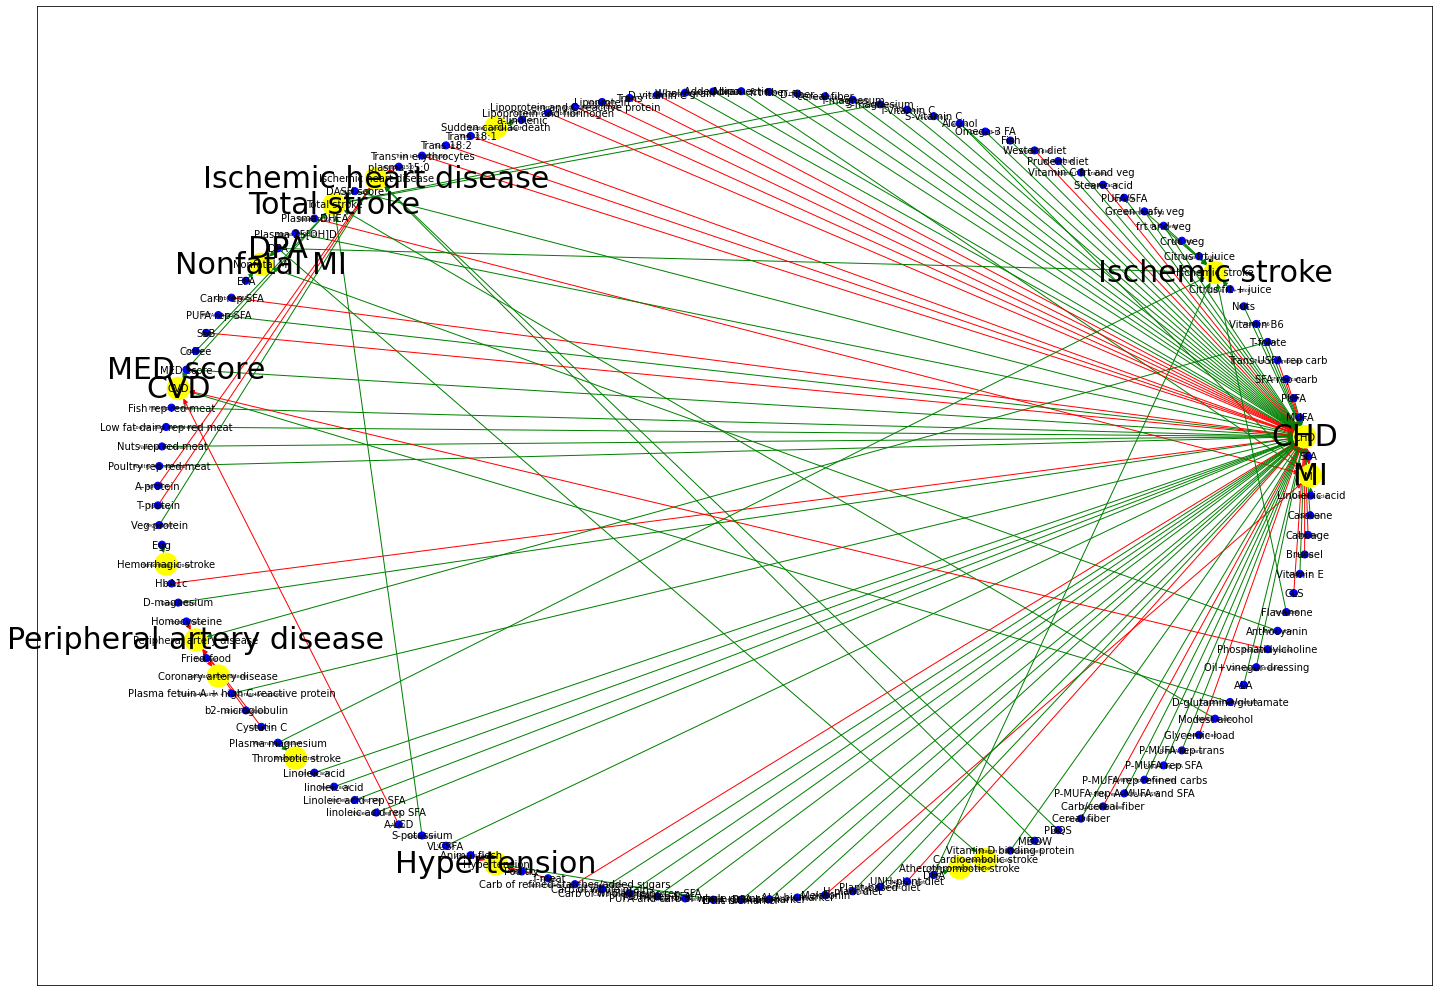

In [158]:
# Draw the graph using the circular layout
from matplotlib.pyplot import text
plt.figure(3,figsize=(25,18)) 
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos=pos, node_size=node_sizes,node_color=node_colors, font_size=10, edge_color=colors)
for node, (x, y) in pos.items():
    text(x, y, node, fontsize=d[node], ha='center', va='center')

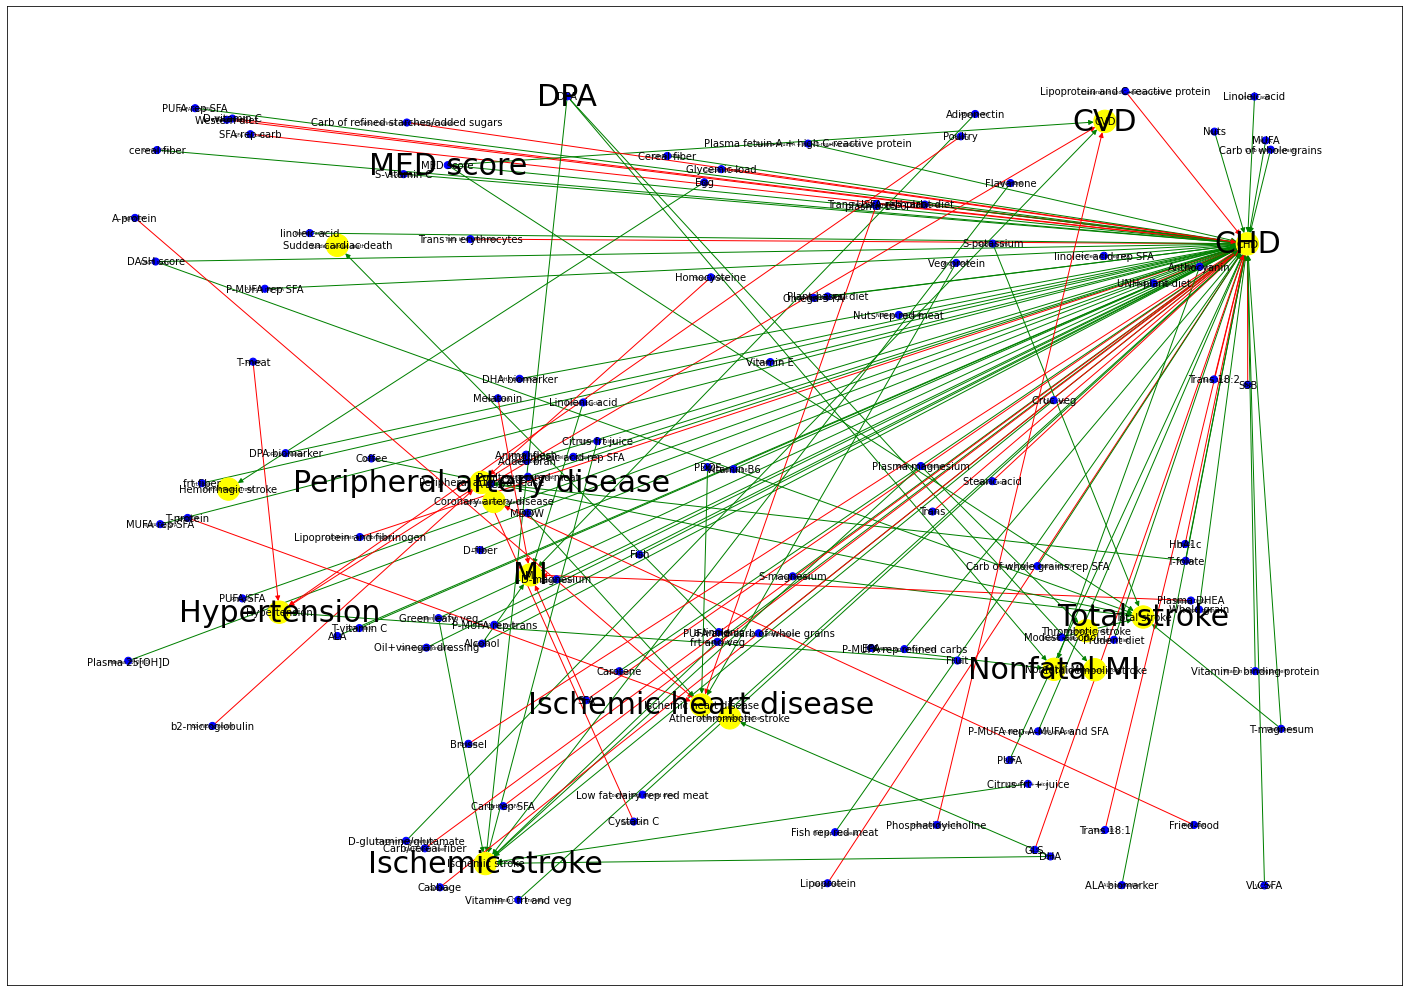

In [159]:
# Draw the graph using the random layout
plt.figure(3,figsize=(25,18)) 
pos = nx.random_layout(G)
nx.draw_networkx(G, pos=pos, node_size=node_sizes,node_color=node_colors, font_size=10, edge_color=colors)
for node, (x, y) in pos.items():
    text(x, y, node, fontsize=d[node], ha='center', va='center')

Degree Centrality Assumption: important nodes have many connections

In [129]:
import operator
degCent = nx.degree_centrality(G)
top_nodes = sorted(degCent.items(), key=operator.itemgetter(1), reverse = True)[0:100]
disease_node=[]
good_factors=[]
bad_factors=[]
[disease_node.append(i) for i in top_nodes if i[0] in phenotype.keys()]
[good_factors.append(i) for i in top_nodes if i[0] in good_dietary_factors]
[bad_factors.append(i) for i in top_nodes if i[0] in bad_dietary_factors]
disease_node[0:5]

[('CHD', 0.6171875),
 ('Ischemic stroke', 0.0703125),
 ('Total stroke', 0.0546875),
 ('MI', 0.046875),
 ('Ischemic heart disease', 0.046875)]

## From the dataset, we notice that CHD are connected to many of the dietary nodes

Dietary/ Medicine Condition Nodes

In [130]:
good_factors[0:20]

[('DPA', 0.0234375),
 ('MED score', 0.0234375),
 ('T-folate', 0.015625),
 ('frt and veg', 0.015625),
 ('Green leafy veg', 0.015625),
 ('Alcohol', 0.015625),
 ('S-magnesium', 0.015625),
 ('T-magnesum', 0.015625),
 ('DASH score', 0.015625),
 ('Plasma magnesium', 0.015625),
 ('DHA', 0.015625),
 ('Linolenic acid', 0.0078125),
 ('MUFA', 0.0078125),
 ('PUFA', 0.0078125),
 ('Vitamin B6', 0.0078125),
 ('Nuts', 0.0078125),
 ('Citrus frt + juice', 0.0078125),
 ('Citrus frt juice', 0.0078125),
 ('Cruc veg', 0.0078125),
 ('PUFA/SFA', 0.0078125)]

Interestingly to see Alchohol listed as good factors as it bring neg impact to heart disease

In [131]:
bad_factors[0:20]

[('SFA', 0.015625),
 ('SFA rep carb', 0.0078125),
 ('Trans USFA rep carb', 0.0078125),
 ('Stearic acid', 0.0078125),
 ('Western diet', 0.0078125),
 ('D-vitamin C', 0.0078125),
 ('Trans', 0.0078125),
 ('Lipoprotein', 0.0078125),
 ('Lipoprotein and C-reactive protein', 0.0078125),
 ('Lipoprotein and fibrinogen', 0.0078125),
 ('Trans 18:1', 0.0078125),
 ('Trans 18:2', 0.0078125),
 ('Trans in erythrocytes', 0.0078125),
 ('plasma 15:0', 0.0078125),
 ('Plasma DHEA', 0.0078125),
 ('Carb rep SFA', 0.0078125),
 ('SSB', 0.0078125),
 ('A-protein', 0.0078125),
 ('T-protein', 0.0078125),
 ('HbA1c', 0.0078125)]

In [162]:
# TBC

# Reference:
## A SYSTEMATIC COMPREHENSIVE LONGITUDINAL EVALUATION OF DIETARY FACTORS ASSOCIATED WITH ACUTE MYOCARDIAL INFARCTION AND FATAL CORONARY HEART DISEASE
#### SOODABEH MILANLOUEI, GIULIA MENICHETTI, YANPING LI, JOSEPH LOSCALZO, WALTER C. WILLETT & ALBERT-LÁSZLÓ BARABÁSI
<br>

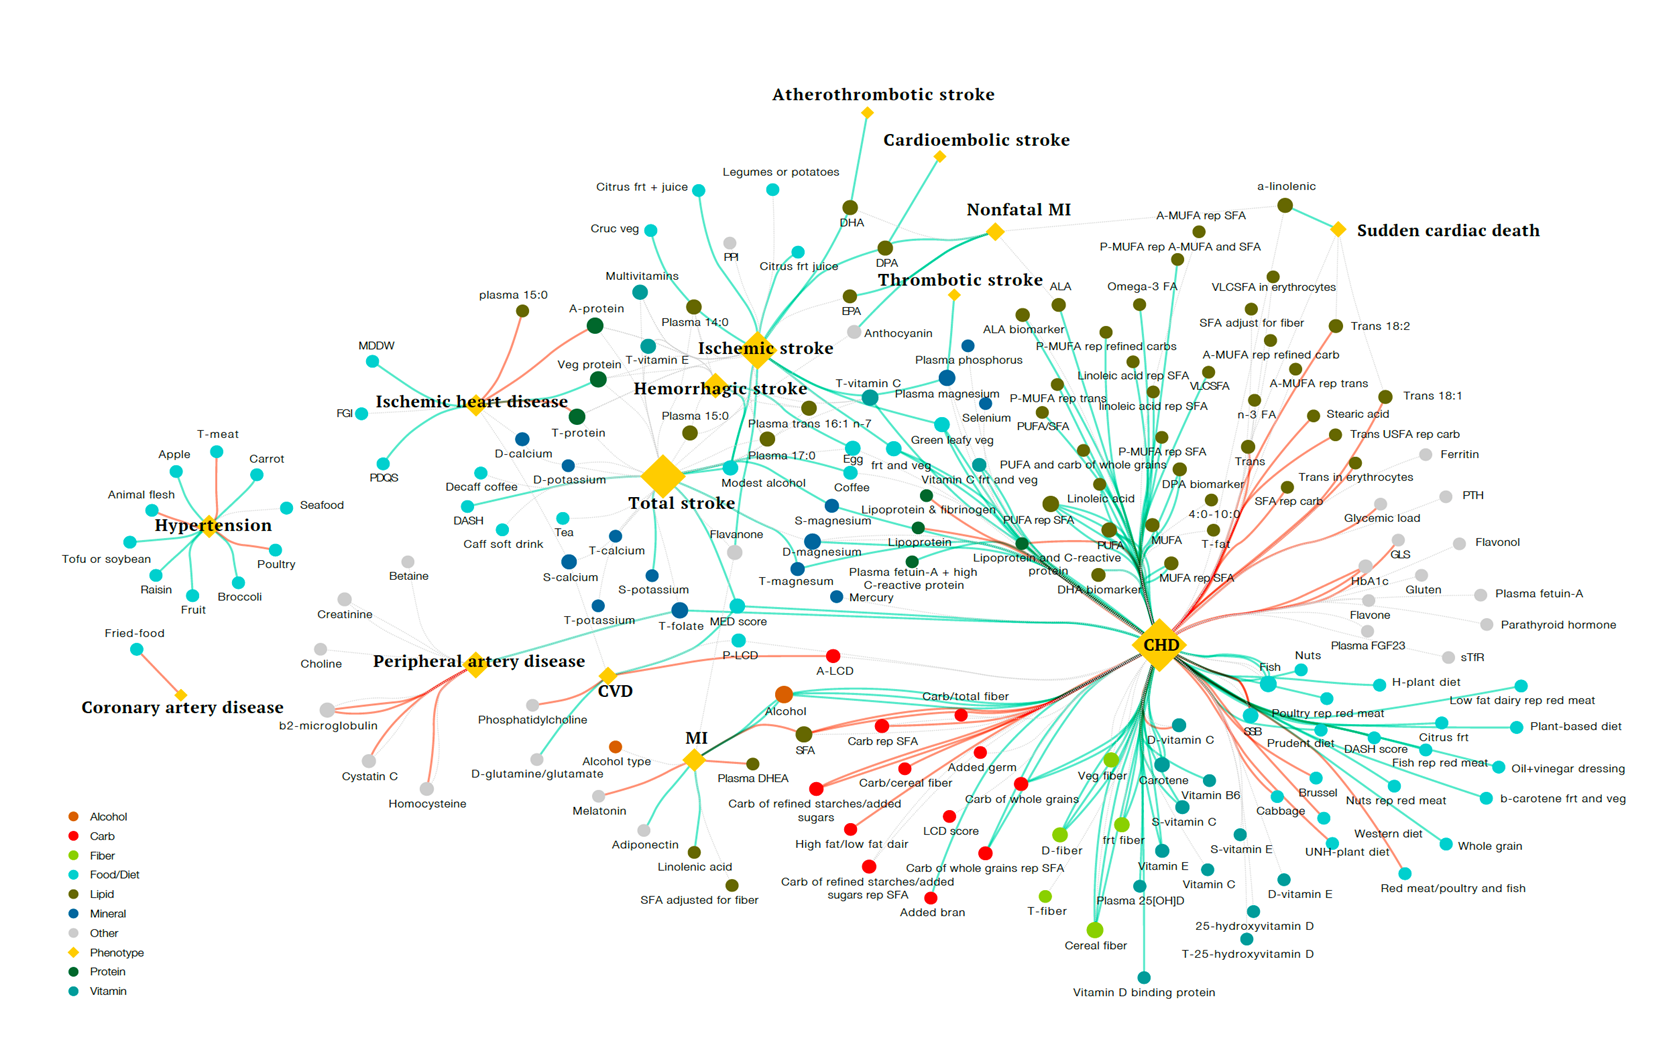
<br>
##### The nodes of the graph are dietary exposures (circles) and cardiovascular diseases (diamonds) as two sets of nodes. Each studied association is shown by an edge whose color denotes the “direction” (i.e., positive or negative) of the association. Green and red links indicate negative and positive associations, respectively, between an exposure and a disease. Grey links denote associations that were studied but not found to be statistically significant. In the context of NHS, CHD refers to non-fatal MI and fatal coronary heart disease; also, coronary artery disease (CAD) refers to non-fatal MI and fatal coronary artery disease. Cardiovascular disease (CVD) is defined as a composite of coronary artery disease and non-fatal or fatal stroke. Source data are provided in Source Data - Figure 1.xlsx. The figure aims to illustrate the body of work derived from NHS data on cardiovascular diseases. A detailed comparison of the result of our analysis with previous NHS-related work and other findings in the literature is provided in the section “Comparison with the literature”.
